In [20]:
%load_ext autoreload
%autoreload 2

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as onp
import jax
import jax.numpy as np
import pickle
import matplotlib.pyplot as plt
from timecast.learners import AR
from timecast.learners._ar import _ar_predict, _ar_batch_window
from timecast.utils.numpy import ecdf
from timecast.utils.losses import MeanSquareError

# import tqdm.notebook as tqdm

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Training

In [ ]:
!python main.py train --camels_root ../data/basin_dataset_public_v1p2 --num_workers 50 --use_mse True --concat_static True --cache_data True

# Evaluation

In [ ]:
!python main.py evaluate --camels_root ../data/basin_dataset_public_v1p2 --run_dir runs/run_2503_0429_seed283956/

In [4]:
data = pickle.load(open("ealstm/runs/run_2503_0429_seed283956/lstm_seed283956.p", "rb"))

In [11]:
results = {"mse": {}, "count": {}}
for key, site in data.items():
    results["mse"][key] = MeanSquareError().compute(site.qobs, site.qsim)
    results["count"][key] = site.shape[0]

In [16]:
def total_mse(results):
    mse = 0
    count = 0
    for key in results["mse"].keys():
        mse += results["mse"][key] * results["count"][key]
        count += results["count"][key]
    return mse / float(count)

In [17]:
total_mse(results)

DeviceArray(3.24451, dtype=float32)

In [18]:
def plot_ecdf(learners):
    for key, learner in learners.items():
        x = np.array([val.item() for key, val in learner["mse"].items()])
        bin_, cdf_ = ecdf(x)
        plt.plot(bin_, cdf_, label=key)
    plt.legend()

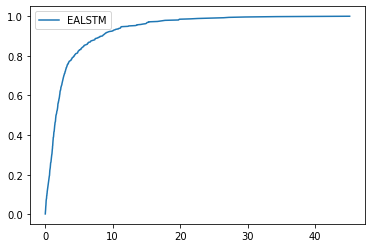

In [19]:
plot_ecdf({"EALSTM": results})